### 第 3 章 利用期货的对冲策略
- 3.1: 期货空头对冲（short hedge)
- 3.2: 期货多头对冲 (long hedge)
- 3.3: 最优对冲比率（Optimal Hedge Ratio）
- 3.4：股指期货对冲（Hedging Using Index Futures）


In [7]:
"""
【例3-1】期货空头：买入空头期货（按固定价格来卖出现货的权利）来对冲风险

假定今天是3月1日。 一家美国公司预期将在7月底收入5000万日元 。CME 集团的日元期货交割月份分别是3月、 6月、 9月和 12月 。 每份合约的交割数量为 1250万日元。 因此这冢公司在3月1日承约4份9月日元期货空头。 在7月底收到日元时， 公司对其期货合约平仓 。 假设日元期货在3月1日的价格为每日元 1.0800 美分，而当期货被平仓时的现货价格与期货价格分别为 1.0200美分和 1.0250美分。

当公司最终收到日元时，它需要进行“平仓”操作，即解除其在期货市场上的空头头寸。这通常涉及“买回”相应数量的日元期货合约，从而关闭其在期货市场上的交易。这个买回动作的成本，加上当时的现货市场汇率，就形成了公司实际购买日元的价格。

"""
#期货空头问题：先承约空头（f1），再通过收款日承约多头（f2）进行抵消（f1-f2），获得盈利。最终兑换价格为当时的现货价格（s2）+ 抵消后的盈利（f1-f2）
#1. 定义参数
n = 4
amount = 12500000 #每个期货的数量
f1 = 1.0800 #锁定了这个汇率价格
f2 = 1.0250 #平仓价（在这个情况中日元贬值了，所以有盈利）
s2 = 1.0200 #平仓时现货价格

#2. 期货合约的盈利：
profit_per_unit = f1 - f2
total_profit = profit_per_unit * n * amount

#3. 基差(现货价格 - 期货价格)：
b2 = s2 - f2

#4. 每日元实际所得美元：
actual_price = f1 + (s2 - f2)

#5. 总美元收益
usd_received = actual_price * amount * n


print(f"期货合约的盈利（每日元）: {profit_per_unit:.4f} 美分")
print(f"合约平仓时的基差: {b2:.4f} 美分")
print(f"实际购买日元的价格: {actual_price:.4f} 美分")
print(f"公司从5000万日元所得的美元数量: ${usd_received:,.2f}")



期货合约的盈利（每日元）: 0.0550 美分
合约平仓时的基差: -0.0050 美分
实际购买日元的价格: 1.0750 美分
公司从5000万日元所得的美元数量: $53,750,000.00


In [9]:
"""
【例3-2】 期货多头：

假定今天是6月8 日，一冢公司知道在10月或11月需要买入20000桶原油。 目前在CME集团纽约商品交易所 (NYMEX) 中，任何一个月交割的原油期货合约都有交易，每份合约的规模为 1000 桶 原油 。 公司决定利用 12月期货进行对冲，并买入了 20 份 12 月合约的多头 。 6 月 8 日 ， 期货价格是每桶 48.00 美元 ，公司在 11 月 10 日需要 购买原油， 因此在该天对期货合约平仓 。 在 11 月 10 日这 一天，现 货价格 和期 货价格分别是 每桶 50.00 美元和每桶 49. 10 美元 。
"""
#期货多头问题：先承约多头（f1），再通过收款日承约空头（f2）进行抵消（f2 - f1），获得盈利。最终兑换价格为当时的现货价格（s2）+ 抵消后的盈利（f1-f2）
#1. 定义参数
n = 20
amount = 1000 #每个期货的数量
f1 = 48 #锁定了这个汇率价格
f2 = 49.1 #平仓价（在这个情况中原油，所以有盈利）
s2 = 50 #平仓时现货价格

#2. 期货合约的盈利：
profit_per_unit = f2 - f1
total_profit = profit_per_unit * n * amount

#3. 基差(现货价格 - 期货价格)：
b2 = s2 - f2

#4. 每日元实际所得美元：
actual_price = f1 + (s2 - f2)

#5. 总美元收益
usd_received = actual_price * amount * n


print(f"期货合约的盈利: {profit_per_unit:.4f} ")
print(f"合约平仓时的基差: {b2:.4f} ")
print(f"实际买入原油的价格: {actual_price:.4f} ")
print(f"购买原油总价格: ${usd_received:,.2f}")


期货合约的盈利: 1.1000 
合约平仓时的基差: 0.9000 
实际买入原油的价格: 48.9000 
购买原油总价格: $978,000.00


In [1]:
'''
Optimal Hedge Ratio:
σs =  standard deviation of ΔS,the change in the spot price during the hedging period
σF = the standard deviation of ΔF, the change in the futures price during the hedging period
ρ is the coefficient of correlation between ΔS and ΔF.

【例3-3】Airline will purchase 2 million gallons of jet fuel in one month and hedges using heating oil futures. From historical data σF =0.0313, σS =0.0263, and ρ= 0.928. The size of one heating oil contract is 42,000 gallons
'''
#1. 定义参数
σF =0.0313
σS =0.0263
ρ= 0.928
QA = 2000000 #size of the position being hedged
QF = 42000#size of contract

#2. optimal hedge ratio
h_star =  ρ * σS /σF

print(f"optimal hedge ratio: {h_star:.4f} ")

#2. optimal number of contracts
N_star = h_star * QA / QF
print(f"optimal number of contracts: {N_star:.4f} ")

#3. Optimal Number of Contracts When Contract Is Settled Daily
#定义参数
σF_hat = 12#'SD of percentage daily changes in futures'
ρ_hat = 12#'Correlation between percentage daily changes for spot and futures'
σS_hat = 12#'SD of percentage daily changes in spot'
VA = 12#'value of the position being hedged'
VF = 12#'futures price times the size of one contract'

h_hat = ρ_hat * σS_hat /σF_hat
N_daily = h_hat * VA/VF

optimal hedge ratio: 0.7798 
optimal number of contracts: 37.1313 


In [15]:
'''
Hedging Using Index Futures
股指期货：用于对冲一只股票
当 BETA=1.0 时，股票组合收益 = 股指收益;
当 BETA=2.0 时，股票组合收益 = 股指收益的两倍;
当 BETA= 0.5 时，股票组合收益 = 无风险利率的收益的一半

【例3-4】Index futures price is 1,000
 Value of Portfolio is $5 million 
 Beta of portfolio is 1.5
What position in futures contracts on the index is necessary to hedge the portfolio?
'''

#1. 定义参数
VA = 5000000
VF = 1000
beta = 1.5

#2. optimal number of contracts
N_star = beta * VA / VF
print(f"optimal number of contracts: {N_star:.4f} ")

'''
更复杂的情况：利用 4 个月期限的期货合约来对股票组合在今后 3 个月内的价值进行对冲

股指当前值 = 1 000 
股指期货价格 = 1010
组合价值 = 5 050 000( 美元) 
无风险利率 = 4% (每年) 
股指券息收益率 = 1%(每年)
beta = 1.5
每份期货合约 = 250 美元*股指
假定股指在 3 个月后为 900, 期货价格为 902, 期货空头的收益为？
'''
#1. 定义参数
s1 = 1000
f1 = 1010
s2 = 900
f2 = 902
amount = 250 #每个期货的数量
beta = 1.5
t = 3/12 #三个月
dividend_yield = .01 * t
r = .04 * t

#2. optimal number of contracts
VF = 250 * 1010
VA = 5050000
N_star = beta * VA / VF
print(f"optimal number of contracts (complicated case): {N_star:.4f} ")

#3. 期货空头的收益
future_profit = N_star * (f1 - f2) * amount
print(f"profit (complicated case): {future_profit:.4f} ")

#4. 利用资产定价模型来计算最终预期值
#股票组合的期望收益 - 无风险利率 = beta X (股指收益-无风险利率)
index_yield_percentage = (s2 - s1)/ s1 + dividend_yield
expected_portfolio_income_percentage = r + (beta * (index_yield_percentage - r))
expected_portfolio_value = (1 + expected_portfolio_income_percentage) * VA
print(f"股票组合的期望收益: {expected_portfolio_value:.4f} ")

#5. 最终投资组合收益（期货收益 + 股票组合收益）
expected_final_value = expected_portfolio_value + future_profit
print(f"最终投资组合收益（期货收益 + 股票组合收益）: {expected_final_value:.4f} ")


optimal number of contracts: 7500.0000 
optimal number of contracts (complicated case): 30.0000 
profit (complicated case): 810000.0000 
股票组合的期望收益: 4286187.5000 
最终投资组合收益（期货收益 + 股票组合收益）: 5096187.5000 


### 第4章 利息 Interest Rates
- 4.1～4.2: 复利公式（compounding)
- 4.3: 债券定价 + par yield + coupon yield
- 4.4: 确定零息利率 (bootstrap method)
- 4.5：远期利率
- 4.6：FRA(远期利率合约)

In [ ]:
import math

#1. 定义参数
A = 100
m = 4 #quarterly compounding
r = .05
t = 1 #number of yrs

#离散/连续复利公式
A_annual_compounded = A * (1+r/m)**(m * t)
A_continuously_compounded = A * math.exp(r * t)

'''
离散利率转连续利率
【例 4-1 】 假设利率报价为每年 10%按半年复利 。 因此 m =2, Rm= 0. 1, 由式 (4-3) 得出，与之等价的连续复利利率为
'''
#1. 定义参数
A = 100
m = 2
r = .1
Rm = 0.1
t = 1 #number of yrs

#计算Rc
Rc  = m * math.log(1 + Rm / m)
print('与之等价的连续复利利率为:', Rc)

'''
连续利率转离散利率
【例 4-2】 假设某贷款人对贷敖利率的报价为每年8% ，连续复利，利息每季度支付一次，因此 m =4, Rc= 0.08。 由式( 4-4) 得出，与之等价的按季度复利的利率为
'''
import math
#1. 定义参数
A = 100
m = 4
r = .1
Rc = .08
t = 1 #number of yrs

#计算Rc
Rm  = m * (math.exp(Rc/m) - 1)
print('与之等价的离散复利利率为:', Rm)

与之等价的连续复利利率为: 0.0975803283388641


In [27]:
'''
债券定价 & 已知零息利率，用精准零息利率贴现
【例 4-3】假设零息利率和maturity已知，表中的利率是按连续复利。 假设一个两年期债券的本金为 100 美 元，券息为 6% ，每半年付息一次，到期归还本金

1. 债券理论价格（bond price）？
2. 债券收益率(y = bond yield)?
3. 平价收益率（c = par yield）?
'''
import math
#定义参数
A = 100
m = 2
coupon = .06 / m

#给表格建模
freq = 4 #表格长度
maturity = [i * 0.5 for i in range(1,freq + 1)]
spot_rate = [i *.01 for i in [5, 5.8, 6.4, 6.8] ]



#1. 计算债券理论价格(本金贴现 + 券息贴现)
coupon_cash_flow = coupon * A
discounted_coupon_cash_flow = []
for i in range(freq):
    cf = coupon_cash_flow * math.exp(-maturity[i] * spot_rate[i])
    discounted_coupon_cash_flow.append(cf)

discounted_A = A * math.exp(-maturity[-1] * spot_rate[-1])

print("券息（cash flow）的贴现值:", discounted_coupon_cash_flow)
print("本金的贴现值:", discounted_A)

bond_price = discounted_A + sum(discounted_coupon_cash_flow)
print("1. 债券理论价格(本金贴现 + 券息贴现):", bond_price)



#2. 计算债券收益率(解y)
from scipy.optimize import fsolve
import numpy as np

def equation(y):
    discounted_y_cash_flow = []
    for i in range(freq):
        cf = coupon_cash_flow * math.exp(-maturity[i] * y)
        discounted_y_cash_flow.append(cf)
    y_discounted_A = A * math.exp(-maturity[-1] * y)
    return y_discounted_A + sum(discounted_y_cash_flow) - bond_price


initial_guess = [1]

y_solution = fsolve(equation, initial_guess)
print("2. 计算债券收益率(解y):", y_solution[0])


#3. 平价收益率（c = par yield）
from scipy.optimize import fsolve
import numpy as np

def equation(c):
    discounted_c_cash_flow = []
    for i in range(freq):
        cf = (c/2) * math.exp(-maturity[i] * spot_rate[i])
        discounted_c_cash_flow.append(cf)
    c_discounted_A = A * math.exp(-maturity[-1] * spot_rate[-1])
    return c_discounted_A + sum(discounted_c_cash_flow) - A


initial_guess = [1]

c_solution = fsolve(equation, initial_guess)
print("3. 平价收益率（c = par yield）:", c_solution[0], '%')

券息（cash flow）的贴现值: [2.925929736084998, 2.8309498423103956, 2.7253920482061185, 2.6185278974661577]
本金的贴现值: 87.28426324887192
1. 债券理论价格(本金贴现 + 券息贴现): 98.38506277293959
2. 计算债券收益率(解y): 0.06762438716028782
3. 平价收益率（c = par yield）: 6.872876169086231 %


In [40]:
'''【4-4】用债券价格确定零息利率 (bootstrap method)
plot the zero curve using given data
'''

import math
from scipy.optimize import fsolve
#定义参数
A = 100
m = 2
#给表格建模
freq = 4 #表格长度
maturity = [0.5, 1, 1.5, 2]
coupon_per_yr = [0,0,4,5] #money returned
bond_price = [99, 97.8, 102.5, 105.0]

#zero rate without coupon (coupon = 0):
zero_curve = []

for i in range(freq):
    if coupon_per_yr[i] == 0:
        def equation(r):
            return bond_price[i] * math.exp(r * maturity[i]) - A
        initial_guess = [1]
        r_solution = fsolve(equation, initial_guess)
        zero_curve.append(r_solution[0])
    else:
        coupon_cash_flow = coupon_per_yr[i] / m
        def equation(r):
            discounted_cash_flow = []
            for j in range (i):
                discounted_cash_flow.append(coupon_cash_flow * math.exp(-maturity[j] * zero_curve[j]))
            final_term = (A + coupon_cash_flow) * math.exp(-r * maturity[i])
            return final_term + sum(discounted_cash_flow) - bond_price[i]
        initial_guess = [1]
        r_solution = fsolve(equation, initial_guess)
        zero_curve.append(r_solution[0])        

zero_curve    



[0.0201006717070027,
 0.022245608947319726,
 0.022844486604668115,
 0.02416378695338813]

In [45]:
''' 
【4-5】用零息利率确定远期利率
forward rate =  future zero rate implied by today’s term structure
'''
#给表格建模
freq = 5 #表格长度
maturity = [i for i in range(1,6)]
zero_rate = [3.0, 4, 4.6, 5, 5.3]
forward_rates = []

for i in range(freq - 1):
    forward_rate = (maturity[i+1] * zero_rate[i+1] - maturity[i] * zero_rate[i])/(maturity[i+1] - maturity[i])
    forward_rates.append(forward_rate)

forward_rates

[5.0, 5.799999999999999, 6.200000000000001, 6.5]

In [46]:
''' 
【4-6】FRA(远期利率合约)
用predetermined forward rate来换actual forward rate

An FRA entered into some time ago states that a company will receive 5.8% (s.a.) and pay SOFR on a principal of $100 million starting in 1.5 years
Forward SOFR for the period between 1.5 and 2 years is 5% (s.a.) The 2 year (SOFR) risk-free rate is 4% with continuous compounding
求value of FRA
'''
import math

#定义参数
A = 100
m = 2
T1 = 1.5
T2 = 2
actual_rate = .05
fixed_rate = .058
r = .04

# 计算fra
FRA_VALUE = A * (fixed_rate - actual_rate) * (T2 - T1) * math.exp(-r*T2)

print(FRA_VALUE)


0.36924653855465434


### 第5章 确定远期和期货价格 Determination of Forward and Futures Prices
- 5.1: 投资资产的远期价格
- 5.2: 消费资产的远期价格

（注意：I和U都是现值，如果给的是未来值（到期付款/收款）的话，需要先折现）

Foward和future均可套用-- When the maturity and asset price are the same, forward and futures prices are usually assumed to be equal.

In [2]:
'''
【例5-1】投资资产的远期价格
long a forward of an asset where r is the T-year risk-free rate of interest. In our examples, S0 =40, T=0.25, and r=0.05, 

1. what is the forward price?
2. value of a long forward contract？
3. value of a short forward contract？
'''
import math

#定义参数
S0 = 40 #资产现值
T = .25
r = .05
K = 41 #远期合约中的协议价格

#特殊情况参数 
I = 0  #如果该投资资产在远期时间内有固定收入，则i为该收入现值
'''
q = 如果已知该资产有某固定连续收益率
比如index的average dividend yield
或者foreign risk-free interest rate （if asset is foreign frequency）
'''
q = 0

#1. 资产远期价格
F0 = (S0 - I) * math.exp((r - q) * T)
print(f"该资产远期价格: {F0:.4f} ")

#2. value of long contract
V_long = (F0 - K) * math.exp(-r * T)
print(f"多头收益: {V_long:.4f} ")

#3. value of short contract
V_short = (K - F0) * math.exp(-r * T)
print(f"空头收益: {V_short:.4f} ")

该资产远期价格: 40.5031 
多头收益: -0.4907 
空头收益: 0.4907 


In [3]:
'''
【例5-2】消费资产的远期价格
long a forward of an asset where r is the T-year risk-free rate of interest. In our examples, S0 =40, T=0.25, and r=0.05, 

1. what is the forward price?
2. value of a long forward contract？
3. value of a short forward contract？
4. cost of carry?
'''
import math

#定义参数
S0 = 40 #资产现值
T = .25
r = .05
K = 41 #远期合约中的协议价格

#特殊情况参数 
u = 0  #如果storage cost按资产比率收费
U = 0 #如果storage cost按固定金额收费
q = 0

#1. 资产远期价格
F0 = (S0 + U) * math.exp((r - q + u) * T)
print(f"该资产远期价格: {F0:.4f} ")

#2. value of long contract
V_long = (F0 - K) * math.exp(-r * T)
print(f"多头收益: {V_long:.4f} ")

#3. value of short contract
V_short = (K - F0) * math.exp(-r * T)
print(f"空头收益: {V_short:.4f} ")

#4. cost of carry
cost_of_carry = r - q + u
print(f"持有成本: {cost_of_carry:.4f} ")

该资产远期价格: 40.5031 
多头收益: -0.4907 
空头收益: 0.4907 
持有成本: 0.0500 


### 第7章 互换（swaps）

- 7.1 value of swap(固定利率换浮动利率)
- 7.2 货币利率互换

In [19]:
''' 
【例7-1】
Swap involves paying 3% per annum and receiving SOFR every six months on $100 million
Swap has 1.2 years remaining (exchanges in 0.2, 0.7, and 1.2 years). Risk-free rate for 0.2, 0.7, and 1.2 years are 2.8%, 3.2% and 3.4%, respectively (continuously compounded). Rate observed for last 0.3 years is 2.3% continuously compounded.

1. what is the value of swap?
'''
#定义参数
m = 2
A = 100
t = 0.5
#表格建模
freq = 3
maturity = [0.2, 0.7, 1.2] 
zero_rate = [i* .01 for i in [2.8, 3.2, 3.4]]
fixed_rate = .03

#1. 计算互换的固定利率方现金流（半年复利，interest = A * (1+fixed_rate/m)**(m * t) - A）
fixed_leg = [A * (1+fixed_rate/m)**(m * t) - A]* freq
print(fixed_leg)


#2. 将浮动利率的后几节转化为远期利率
#在这里，第1个交付期情况特殊。由于每半年付息，我们需要考虑0.2年之前的0.3年--平时用spot rate就可以
float_rate = []
sofr_before_start = 2.3 * 0.01
float_rate.append(.3/.5 * sofr_before_start + .2/.5 * zero_rate[0])
#接下来的交付期用forward rate
for i in range(freq - 1):
    forward_rate = (maturity[i+1] * zero_rate[i+1] - maturity[i] * zero_rate[i])/(maturity[i+1] - maturity[i])
    float_rate.append(forward_rate)
#由于另一边leg是半年付息，这里我们也要把连续利率转化为半年付息（Rm  = m * (math.exp(Rc/m) - 1)）
float_rate = [m * (math.exp(i/m) - 1) for i in float_rate]


#3. 计算浮动利率方的现金流
print(float_rate)
float_leg = [A*i/m for i in float_rate]
print(float_leg)


#4. 计算swap价值（这个case是付fixed收到float）
discounted_net_cash_flow = [(x - y)*math.exp(-r * z) for x, y, r, z in zip(float_leg, fixed_leg, zero_rate, maturity)]
value_of_swap = sum(discounted_net_cash_flow)
print(value_of_swap)


[1.4999999999999858, 1.4999999999999858, 1.4999999999999858]
[0.025156903081268833, 0.03388382720465222, 0.03714064608849865]
[1.2578451540634417, 1.6941913602326109, 1.8570323044249326]
0.2918458130188146


In [31]:
'''
【例7-2】 货币利率互换
All Japanese interest rates are 1.5% per annum (cont. comp.)
All USD interest rates are 2.5% per annum (cont. comp.)
3% is received in yen; 4% is paid in dollars. Payments are made annually
Principals are $10 million and 1,200 million yen Swap will last for 3 more years
Current exchange rate is 110 yen per dollar

1. what is the value of swap?
'''
#定义参数
m = 1
A_japan = 1200
A_usd = 10
t = 1
pay_rate = .04
receive_rate = .03
r_japan = 1.5 *.01
r_usd = 2.5 *.01

#表格建模
freq = 3
maturity = [1,2,3]

#1. legs(暂不考虑汇率)
leg_japan = [A_japan * (1+receive_rate/m)**(m * t) - A_japan] * freq
leg_japan[-1] = leg_japan[-1] + A_japan #最后一次加上本金
leg_usd = [A_usd * (1+pay_rate/m)**(m * t) - A_usd] * freq
leg_usd[-1] = leg_usd[-1] + A_usd #最后一次加上本金
print("leg_japan:", leg_japan)
print("leg_usd:", leg_usd)

#2. 计算远期汇率
currency_exchange_rate = []
for t in range(1, freq+1):
    currency_exchange_rate.append((1/110)* math.exp((r_usd - r_japan) * t)) 

#3.将日元换汇成美元
leg_japan_in_usd = [x*y for x,y in zip(leg_japan,currency_exchange_rate)]

#4. 计算net cash flow & value of swap
discounted_net_cash_flow = [(x - y)*math.exp(-r_usd * z) for x, y, z in zip(leg_japan_in_usd, leg_usd, maturity)]
value_of_swap = sum(discounted_net_cash_flow)
print(value_of_swap)


leg_japan: [36.0, 36.0, 1236.0]
leg_usd: [0.40000000000000036, 0.40000000000000036, 10.4]
0.9627879764729588


### 第11章 股票期权的性质（Properties of Stock Options）
- 【11-1】影响股票期权价格的六大因素
- 【11-2】看跌-看涨平价关系式

In [ ]:
''' 
【11-1】影响股票期权价格的六大因素
'''
#六大因素：
S0 = 50     #当前股票价格
K = 50      #执行价格
T = 1       #期权期限
σ = 0.3     #股价的波动率
r = 0.05    #在T时刻的无风险利率
d = 0       #预计支付的股息

#要求的变量
ST = 0      #T时刻
#美式看涨，看跌期权价格
C = 0
P = 0
#欧式看涨，看跌期权价格
c = 0
p = 0

In [ ]:
''' 
【11-2】看涨-看跌平价关系式
c + Ke^(-rT) = p + S0
'''

### 第13章 二叉树（Binomial trees)
- 【13-1】单步二叉树
- 【13-2】两步二叉树

(含股息的二叉树见1-3 hw)


In [38]:
''' 
【13-1】单步二叉树:
股票不论上涨还是下跌，投资组合的价值相等，且无风险投资组合的收益率等千无风险利率
S0*u*Δ - fu = S0*d*Δ - fd
Δ = 一份股票多头 + 一份期权空头

e.g. A stock price is currently $20
In 3 months it will be either $22 or $18
A 3-month call option on the stock has a strike price of 21.
Risk-Free Rate is 4%
'''

#1. 定义参数：
S0 = 20
K = 21
u = 1.1
d = 0.9
r = 0.04
T = 0.25  #总时长
n = 1     #步数
dt = 0.25 #步长

#2. 通过u, d来计算上涨概率p
p = (math.exp(r * dt) - d) / (u - d)

#计算Su, Sd, fu, fd (二叉树模型构建)
Su = S0 * u
Sd = S0 * d
fu = max(Su - K, 0) #call option: 收益为股票，支出为买入价
fd = max(Sd - K, 0)

#3. ƒ = [ pƒu + (1 – p)ƒd ]e–rT
f = (p * fu + (1-p) * fd) * math.exp(-r * dt)

print(f)

0.544775748128743


In [58]:
''' 
【13-2】多步二叉树:

考虑波动率后的模型

Consider the following economic inputs:
S = 100; K=100; Rf = 3%; σ = 20% T = 2
Year Semi-annual time steps (4 Time Steps) 
Calculate the following:
a) European and American Value of a Put option?
'''
import numpy as np

#1. 定义参数
S = 100
K=100
Rf = 0.03
σ = 0.2
T = 2
n = 4
dt = T/n


#2. 计算u, d, p
u = np.exp(σ * np.sqrt(dt))#根据波动率来给u建模
d = 1/u 
p = (np.exp(r * dt) - d) / (u - d)

#3. 构建二叉树（n*n matrix）
stock_prices = np.zeros((n+1, n+1))             
option_values_european = np.zeros((n+1, n+1))
option_values_american = np.zeros((n+1, n+1))

# 股价二叉树模型（含dividend）
for i in range(n+1):
    for j in range(i+1):
        #单个node的股价
        stock_price = S * (u ** j) * (d ** (i - j))
        stock_prices[i, j] = stock_price

#4. 计算到期时的期权价格
for j in range(n+1):
    option_values_european[n, j] = max(K - stock_prices[n, j], 0)
    option_values_american[n, j] = max(K - stock_prices[n, j], 0)


#5. 计算最终欧美期权
for i in range(n-1, -1, -1):
    for j in range(i+1):
        option_values_european[i, j] = np.exp(-Rf * dt) * (p * option_values_european[i+1, j+1] + (1-p) * option_values_european[i+1, j])
        # For American options, consider the possibility of early exercise
        option_values_american[i, j] = max(K - stock_prices[i, j], np.exp(-Rf * dt) * (p * option_values_american[i+1, j+1] + (1-p) * option_values_american[i+1, j]))


# The value of the options at t=0
european_put_value = option_values_european[0, 0]
american_put_value = option_values_american[0, 0]

print(p)
print("European put value: ", european_put_value) 
print("American put value: ", american_put_value)

0.5179585268029778
European put value:  7.581044301662419
American put value:  8.590088466239445


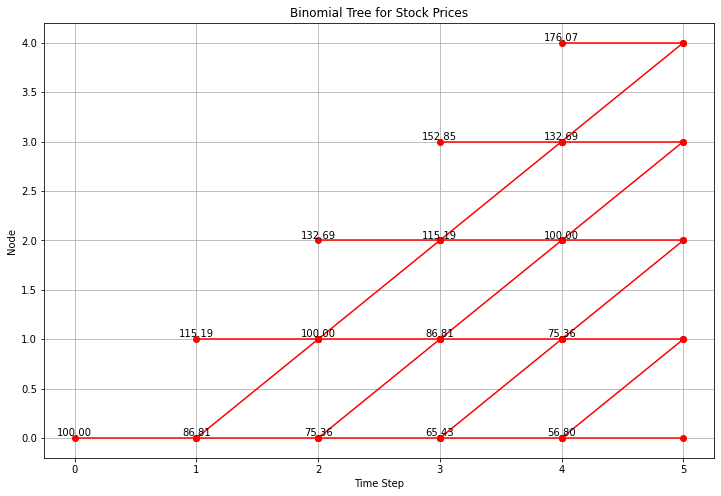

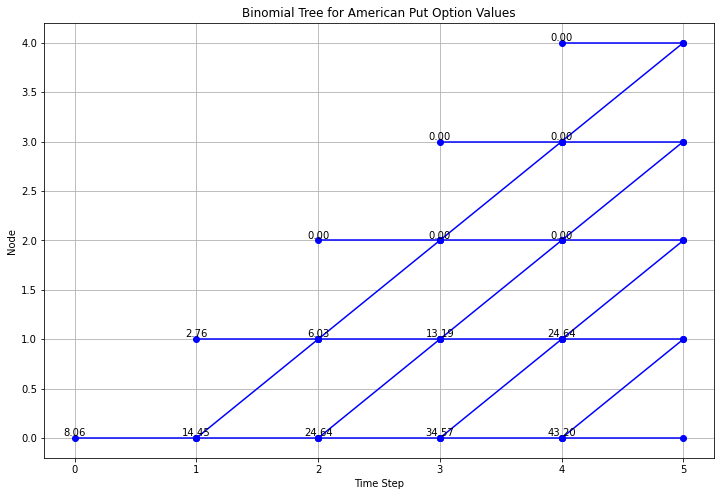

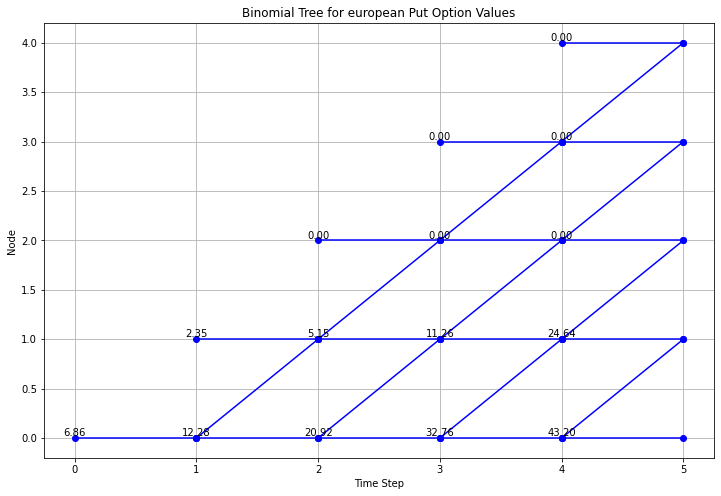

In [54]:
import matplotlib.pyplot as plt

def plot_binomial_tree(stock_prices, title='Binomial Tree for Stock Prices'):
    plt.figure(figsize=(12, 8))
    for i in range(n+1):
        for j in range(i+1):
            plt.plot([i, i+1], [j, j], 'ro-')  # Horizontal lines
            if j < i:
                plt.plot([i, i+1], [j, j+1], 'ro-')  # Upward lines
            plt.text(i, j, f'{stock_prices[i, j]:.2f}', ha='center', va='bottom')
    plt.title(title)
    plt.xlabel('Time Step')
    plt.ylabel('Node')
    plt.grid(True)
    plt.show()

def plot_option_values(option_values, title='Binomial Tree for Option Values'):
    plt.figure(figsize=(12, 8))
    for i in range(n+1):
        for j in range(i+1):
            plt.plot([i, i+1], [j, j], 'bo-')  # Horizontal lines
            if j < i:
                plt.plot([i, i+1], [j, j+1], 'bo-')  # Upward lines
            plt.text(i, j, f'{option_values[i, j]:.2f}', ha='center', va='bottom')
    plt.title(title)
    plt.xlabel('Time Step')
    plt.ylabel('Node')
    plt.grid(True)
    plt.show()

# Plot the stock price tree
plot_binomial_tree(stock_prices)

# Plot the American put option value tree
plot_option_values(option_values_american, 'Binomial Tree for American Put Option Values')

plot_option_values(option_values_european, 'Binomial Tree for european Put Option Values')

### 第14章 Wiener Processes and Itô’s Lemma （维纳过程和伊藤引理）

### 第15章 The Black-Scholes-Merton Model （BSM模型）


### 第22章 VaR(在险价值)和 ES（预期亏损） 的测度 
- 【22-1】通过历史数据来测算Var和ES
- 【22-2】通过正态分布模型来测算Var和ES（单一资产）
- 【22-3】通过正态分布模型来测算Var和ES（多资产）
- 【22-4】通过PCA来计算VaR


- VaR: 两个参数，持有期（T）,置信度（ci）-- n天内有百分之多少的概率会亏这么多以上
- Expected shortfall: 如果损失超过了var，预期亏损是多少
- 建模基于假设：亏损分布服从均值 μ 、标准差 o 的正态分布

In [84]:
''' 
【22-1】示例 : 通过历史数据计算var
Calculation of 10-day, 99% VaR or ES for a Portfolio on July 8, 2020 ,given the portfolio

S&P 500: 4,000
FTSE 100: 3,000
CAC 40: 1,000
Nikkei 225: 2,000
'''
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True, precision=4)

#1. 读取数据, 定义参数
n = 10
ci = 99
df = pd.read_csv('22-1.csv')
df.head()

,Date,S&P 500,FTSE-500,CAC-40,Nikkei,Unnamed: 5,Unnamed: 6
0,5/9/18,5292.90,8830.229,16910.33,322.3993,NaN,NaN
1,5/10/18,5343.70,8926.561,16915.41,321.2446,NaN,NaN
2,5/11/18,5354.69,8982.756,17065.64,326.1963,NaN,NaN
3,5/14/18,5359.66,8999.310,17121.67,328.0291,NaN,NaN
4,5/15/18,5323.23,9003.785,17130.13,326.1704,NaN,NaN


In [86]:
#2. 给portfolio建模
portfolio = {
    'S&P 500': 4000,
    'FTSE-500': 3000,
    'CAC-40': 1000,
    'Nikkei': 2000}
total = 4000+3000+1000+2000

#3. 500 simulation trials
simulation_trials = np.zeros((500, 6))
for i in range(500):
    for index, key in enumerate(portfolio.keys()):
        simulation_trials[i][index] = df[key][i+1] / df[key][i] * df[key][500]
        simulation_trials[i][4] += simulation_trials[i][index] * portfolio[key] / df[key][500]
    simulation_trials[i][5] = total - simulation_trials[i][4]
print(simulation_trials[:5])

# 4. 计算99%VaR: 先排序，取top 99%亏损
loss = simulation_trials[:, 5] 
percentile_99 = np.percentile(loss, ci)
values_above_99 = loss[loss >= percentile_99]
print(f"Values above the 99th percentile: {values_above_99}")

# 5. 计算VaR: 10 天 99% 的 VaR 通常是将 1 天 99% 的 VaR 乘以 sqrt(n),
VaR_10_99 = np.min(values_above_99) * np.sqrt(n)
print("VaR_10_99:", VaR_10_99)

#6. 计算ES
ES = np.average(values_above_99)
print("ES: ", ES)


[[ 6558.4884  7334.1918 15545.1085   340.7882 10064.2563   -64.2563]
 [ 6509.5001  7300.7164 15678.4585   347.2849 10066.8218   -66.8218]
 [ 6502.1694  7268.4141 15591.4625   343.9348 10023.7618   -23.7618]
 [ 6451.9853  7258.6516 15548.1187   340.0752  9963.4651    36.5349]
 [ 6524.3298  7250.1795 15436.6564   338.7552  9989.6167    10.3833]]
Values above the 99th percentile: [490.2147 653.5419 922.484  858.4228 422.2913]
VaR_10_99: 1335.4024007065877
ES:  669.3909494653544


In [107]:
'''
【22-2】通过模型构建法，单一资产，日波动率(假设价格变化服从正态分布)
当我们采用模型构建法计算 VaR 与 ES 时，一般以“日”为时间单位，对资产波动率的度量单位 往往采用“日波动率”。
σ_day = σ_yr / np.sqrt(252)

例：单一资产， N = 10 天和 X =99%，假定微软公司股票的日波动率为 2% (对应的年波动率为 32% )，因为交易头寸的数量为 1 000 万美元，所以交易组合每天价值变化的标准差为 1 000 万美元的 2% ，即 200 000 美元 。假设在持有期内市场价格变化的期望值为 0。
'''
#1. 定义参数
T = 10
CI = 0.99
A = 10000000
σ_day = 0.02 
yr_profit = .2


#2. 计算每日sd（每日收益model = 0）
sd_day = σ_day * A
μ = 0

#3. 计算normsinv，99%属于几倍标准差
from scipy.stats import norm
probability = 1 - CI
normsinv_value = norm.ppf(probability)

#4. 计算var
VaR_10_99 = normsinv_value * sd_day * np.sqrt(T)
print("VaR_10_99:", VaR_10_99)

#5. 计算ES
ES = μ + (sd_day * np.exp((-(normsinv_value)**2)/2))/(np.sqrt(2* np.pi)*(1 - CI))
print("ES:", ES)

VaR_10_99: -1471311.5823719108
ES: 533042.8440691611


In [92]:
'''
【22-3】通过模型构建法，单一资产，日波动率(假设价格变化服从正态分布)
当我们采用模型构建法计算 VaR 与 ES 时，一般以“日”为时间单位，对资产波动率的度量单位 往往采用“日波动率”。
σ_day = σ_yr / np.sqrt(252)

例：假设除了上题的微软，我们还投了500万美元的att，日波动率为 1% (对应的年波动率大约为 16% ) 。假定微软与 AT&T 的股票价格变化服从二元正态分布，分布的相关系数为 0.3。
'''
#1. 分别计算每日标准差
sd_x = 10000000 * .02
sd_y = .01 * 5000000
rho = 0.3

#2. 计算组合标准差
sd_xy = np.sqrt(sd_x**2 + sd_y**2 + 2*rho*sd_x*sd_y)
print("组合标准差:", sd_xy)

#3. 计算normsinv，99%属于几倍标准差
from scipy.stats import norm
probability = 1 - CI
normsinv_value = norm.ppf(probability)

#4. 计算var
VaR_10_99 = normsinv_value * sd_xy * np.sqrt(T)
print("VaR_10_99:", VaR_10_99)

组合标准差: 220227.15545545242
VaR_10_99: -1620113.8228721323


In [ ]:
''' 
【22-3】 利用主成分分析法计算 VaR
例：已知Sensitivity of portfolio to 1 bp rate move in 5 yrs, 
'''

### 第23章 估计波动率和相关系数 Estimating Volatilities and Correlations
- 【23-1】 Standard approach
- 【23-2】 

In [ ]:
''' 
【23-1】 Standard approach
sigma_n = volatility/day between day n-1 and 
'''
import numpy as np

σ_n = 0.2 #volatility/day between day n-1 and n\
S = np.array([...])  #value of market variable at end of day i


